In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')
customers = pd.read_csv('Customers.csv')

In [3]:
# Convert date columns to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [4]:
# Data Cleaning
# Check for duplicates and drop them if any
transactions = transactions.drop_duplicates()
products = products.drop_duplicates()
customers = customers.drop_duplicates()

In [5]:
# Check for missing values
print("Missing Values:")
print("Transactions:", transactions.isnull().sum())
print("Products:", products.isnull().sum())
print("Customers:", customers.isnull().sum())

Missing Values:
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [6]:
# Basic Statistics
print("\nBasic Statistics:")
print(transactions.describe())
print(products.describe())
print(customers.describe())


Basic Statistics:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  179
top         C0001  Lawrence Carroll  South America  2024-11-11 00:00:00
freq            1                 1             59                    3
first         NaN               NaN            NaN  2022-01-22 

C:\Users\harsh\AppData\Local\Temp\ipykernel_15604\739625134.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(customers.describe())


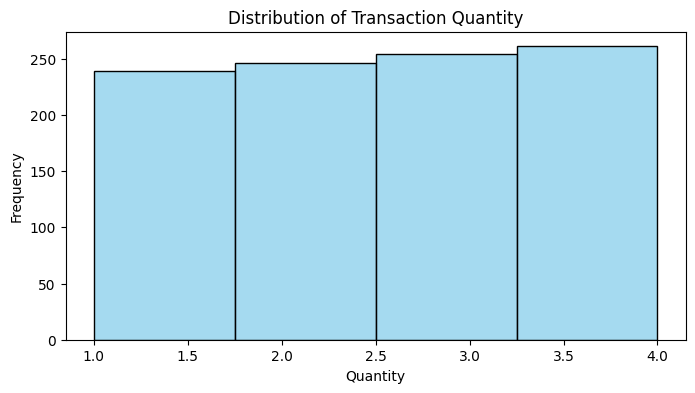

In [7]:
# EDA Visualizations

# 1. Distribution of transaction quantity
plt.figure(figsize=(8, 4))
sns.histplot(transactions['Quantity'], bins=4, kde=False, color='skyblue')
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


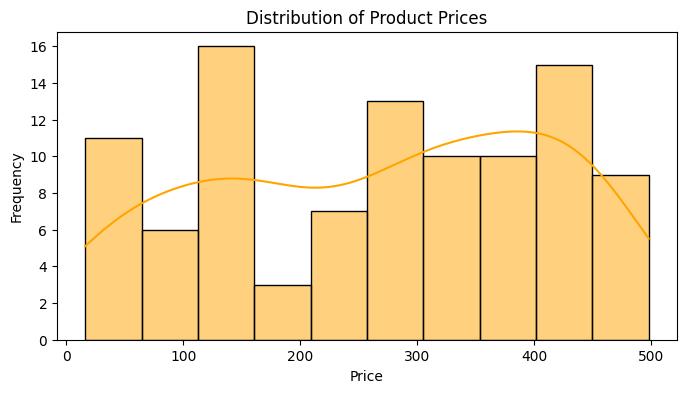

In [8]:
# 2. Distribution of product prices
plt.figure(figsize=(8, 4))
sns.histplot(products['Price'], bins=10, kde=True, color='orange')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_15604\664577648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis', order=customers['Region'].value_counts().index)


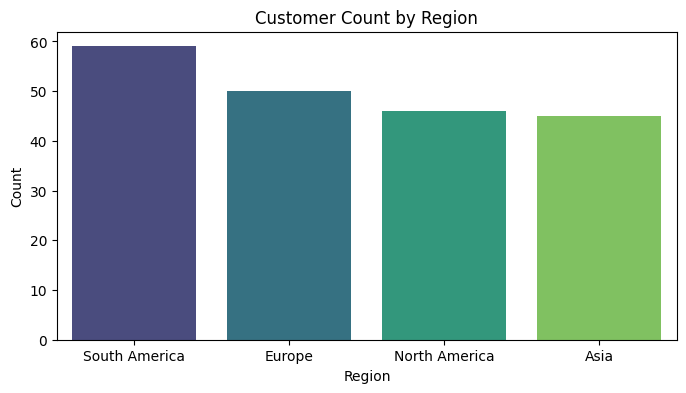

In [9]:
# 3. Customer regions distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=customers, x='Region', palette='viridis', order=customers['Region'].value_counts().index)
plt.title('Customer Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

In [12]:
# 4. Top 10 products by frequency in transactions
top_products = transactions['ProductID'].value_counts().head(10).reset_index()
top_products.columns = ['ProductID', 'Frequency']
top_products = pd.merge(top_products, products[['ProductID', 'ProductName']], on='ProductID')

C:\Users\harsh\AppData\Local\Temp\ipykernel_15604\2038002145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='ProductName', x='Frequency', palette='coolwarm')


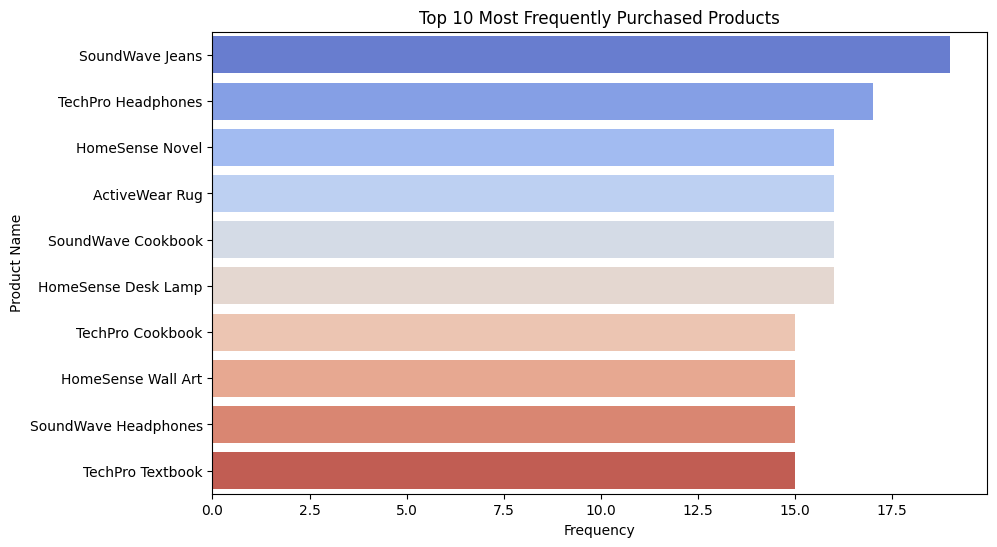

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, y='ProductName', x='Frequency', palette='coolwarm')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.show()

In [14]:
# 5. Monthly transaction trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_trend = transactions.groupby('Month').size()

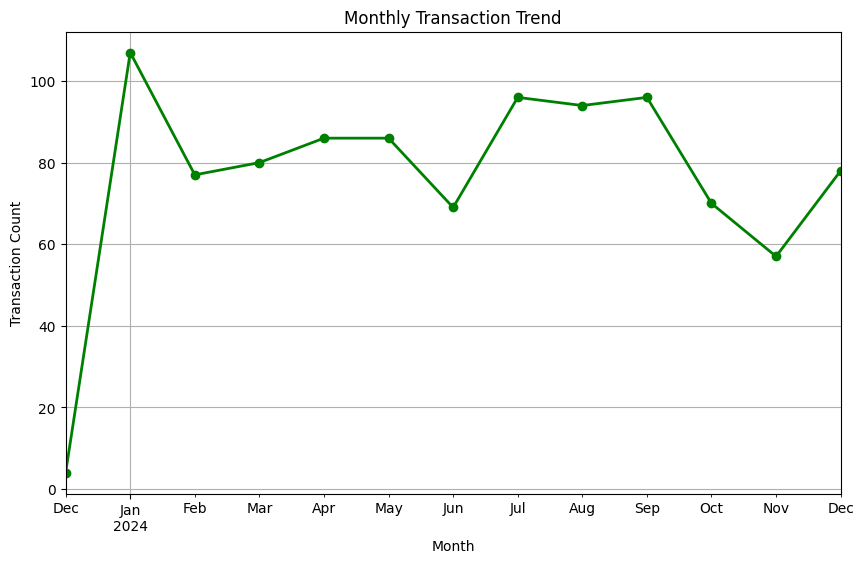

In [15]:
plt.figure(figsize=(10, 6))
monthly_trend.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Monthly Transaction Trend')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

In [16]:
# 6. Average spending by region
avg_spending = transactions.groupby(transactions['CustomerID'])['TotalValue'].sum().reset_index()
avg_spending = pd.merge(avg_spending, customers[['CustomerID', 'Region']], on='CustomerID')

C:\Users\harsh\AppData\Local\Temp\ipykernel_15604\3480494018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spending, x='Region', y='TotalValue', estimator=sum, palette='mako')


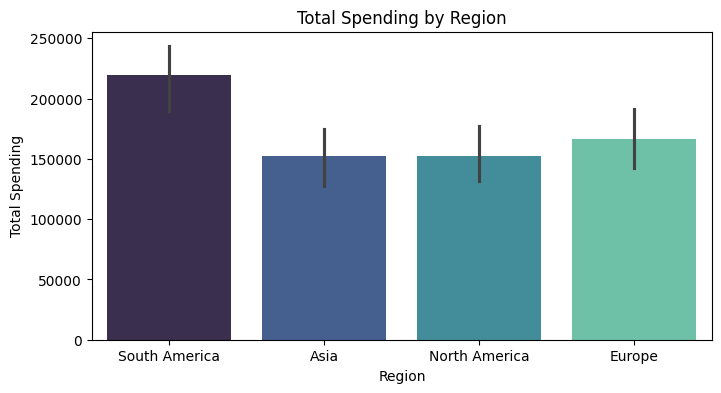

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_spending, x='Region', y='TotalValue', estimator=sum, palette='mako')
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

In [18]:
# 7. Product category analysis
product_category = products.groupby('Category')['Price'].mean().reset_index()

C:\Users\harsh\AppData\Local\Temp\ipykernel_15604\264815656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_category, x='Category', y='Price', palette='rocket')


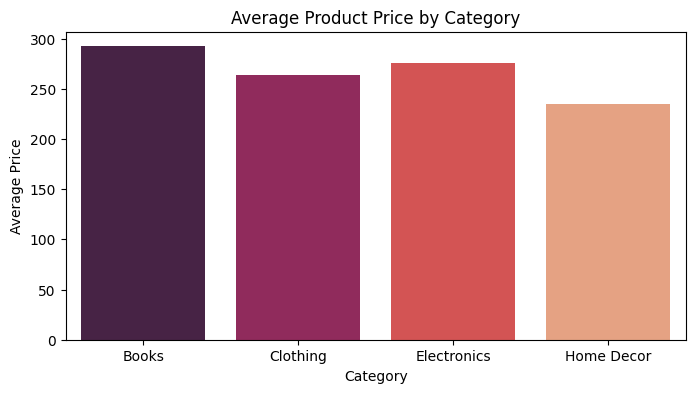

In [19]:
plt.figure(figsize=(8, 4))
sns.barplot(data=product_category, x='Category', y='Price', palette='rocket')
plt.title('Average Product Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()